# EWMCOV new data

In [1]:
first_year = 2008; last_year = 2020;

In [2]:
if (!require("quantmod")) {
    install.packages("quantmod");
    library("quantmod");
}

getSymbols(c("AAPL", "MSFT", "ADBE", "GOOGL", "NVDA", "NFLX", "AMZN", "GOOG", "HPQ"),src="yahoo");

df = cbind(
  coredata(AAPL["2008-01/2021-08"])[,4],
  coredata(MSFT["2008-01/2021-08"])[,4],
  coredata(ADBE["2008-01/2021-08"])[,4],
  coredata(GOOGL["2008-01/2021-08"])[,4],
  coredata(NVDA["2008-01/2021-08"])[,4],
  coredata(NFLX["2008-01/2021-08"])[,4],
  coredata(AMZN["2008-01/2021-08"])[,4],
  coredata(GOOG["2008-01/2021-08"])[,4],
  coredata(HPQ["2008-01/2021-08"])[,4]
);

tmp = c();
for(i in 1:9) {
    tmp = cbind(tmp, diff(log(df[,i])));
}

df = as.data.frame(tmp);

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symb

[1] "AAPL"  "MSFT"  "ADBE"  "GOOGL" "NVDA"  "NFLX"  "AMZN"  "GOOG"  "HPQ"

In [3]:
head(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0004619134,0.004249843,0.001916216,0.0002042989,-0.007907584,-0.01068305,-0.0108640054,0.0002042827,0.00000000
2,-0.0794059929,-0.028388946,-0.034817880,-0.0422164262,-0.087705580,-0.05763252,-0.0698109255,-0.0422165061,-0.05762064
3,-0.0134754924,0.006667657,-0.002977645,-0.0118661591,-0.109071095,0.01091157,0.0003378076,-0.0118660887,-0.03296761
4,-0.0366346684,-0.034090870,-0.025674729,-0.0274349111,0.020968213,-0.06561112,-0.0106396365,-0.0274349235,-0.04880117
5,0.0464935649,0.029166834,0.006100629,0.0335004615,0.050401014,-0.01295910,-0.0307360536,0.0335004220,0.02853094
6,-0.0077220909,-0.003198985,-0.005336031,-0.0099545034,-0.020987129,0.07130899,-0.0113288795,-0.0099544992,0.02004971


In [4]:
tail(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3435,-0.0006014232,-0.006685680,0.0005783502,0.0086739405,-0.007542762,0.0001444892,0.012146235,9.164143e-03,0.011834493
3436,-0.0084569537,-0.002017714,-0.0006696935,0.0057704928,0.019088940,-0.0105904877,-0.001998528,3.865464e-03,0.016812851
3437,-0.0055424814,-0.009715644,-0.0067369743,-0.0045041136,-0.006549162,0.0046278264,0.005085305,-5.802053e-03,-0.009916272
3438,0.0071588946,0.002104191,0.0093523575,0.0179619492,0.025413000,0.0158698926,0.010090620,1.693606e-02,-0.006204777
3439,0.0299637224,0.012829385,0.0112797172,0.0040645254,0.002294609,0.0129057167,0.021249673,6.337475e-03,0.027959544
3440,-0.0084604080,-0.005648490,-0.0034443822,0.0007397099,-0.013445054,0.0053022646,0.014282715,-5.152519e-05,0.000000000


In [5]:
dim(df)

[1] 3440    9

In [6]:
source("xpca.R")

In [7]:
means_covs = ewmcov(alpha=.9305, df[,1:9]);
means = means_covs$means;
covs = means_covs$covs;

In [8]:
length(covs)

[1] 3440

In [9]:
covs[3441]

[[1]]
NULL

In [10]:
df[3441,1:9]

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


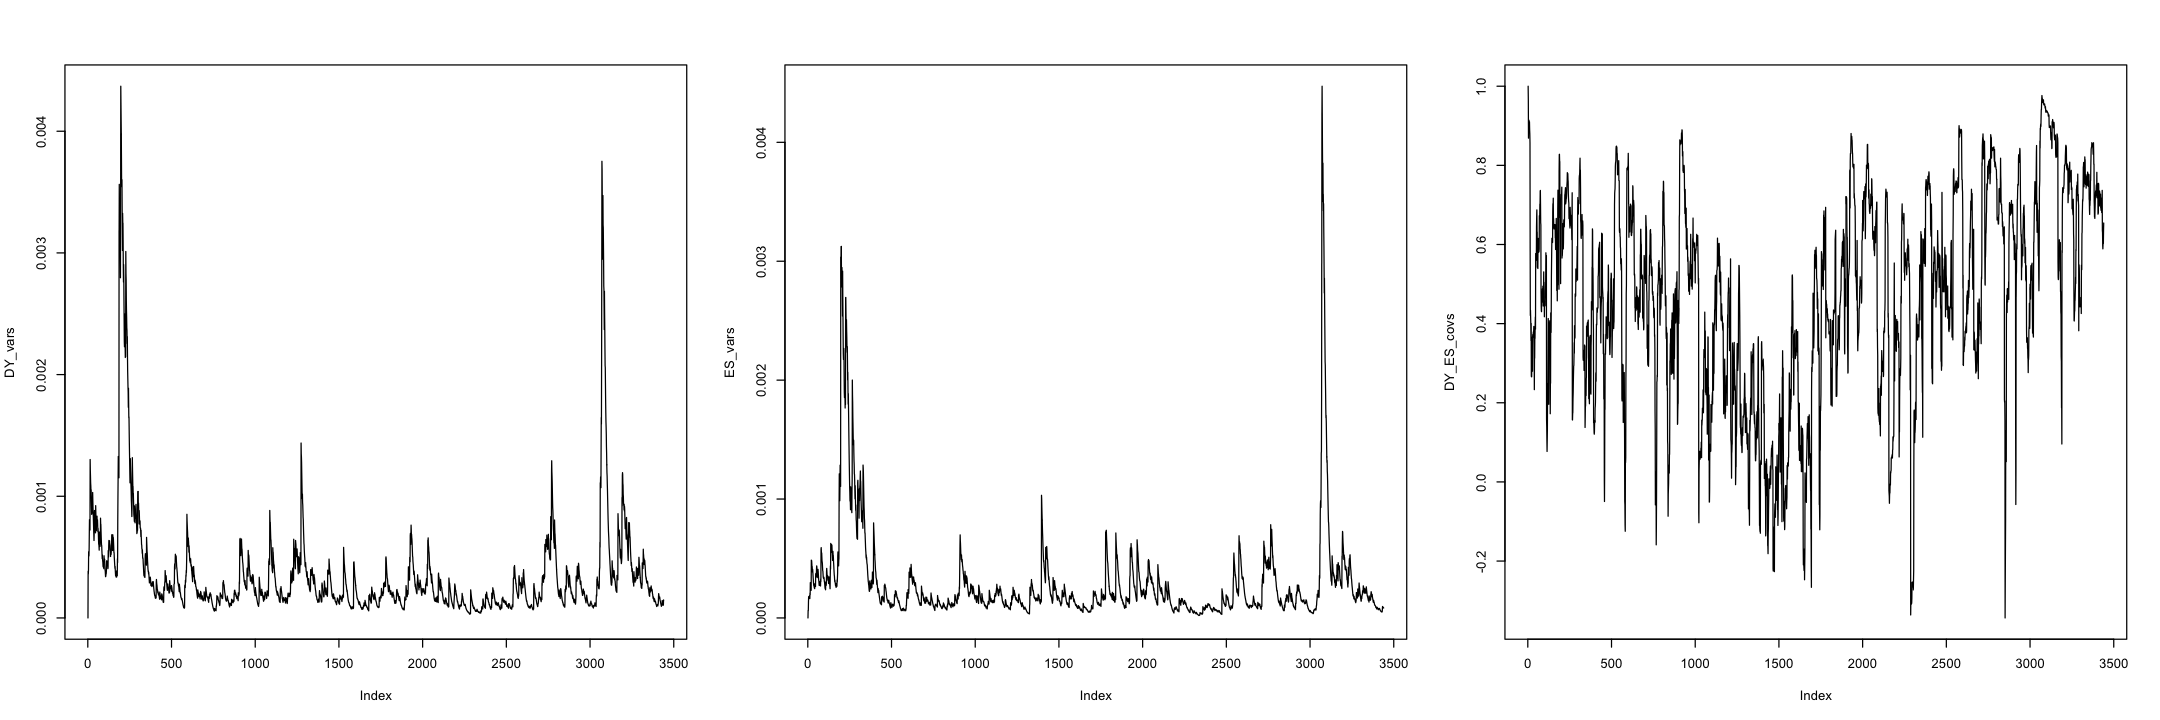

In [11]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3));
DY_index = 1;
ES_index = 2;
DY_vars = rep(0, length(covs));
ES_vars = rep(0, length(covs));
DY_ES_covs = rep(0, length(covs));
for (i in 1: length(covs)) {
    S = covs[[i]]
    DY_vars[i] =  S[DY_index, DY_index];
    ES_vars[i] =  S[ES_index, ES_index];
    DY_ES_covs[i] =  S[DY_index, ES_index] / (sqrt(DY_vars[i] * ES_vars[i]));
}
plot(DY_vars, type="l");
plot(ES_vars, type="l");
plot(DY_ES_covs, type="l");

In [12]:
sample_cov = cov(df[,1:9]);
sample_cov

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,0.0004045700,0.0002020843,0.0002247906,0.0002139481,0.0002946269,0.0002015452,0.0002324737,0.0002139038,0.0001910657
V2,0.0002020843,0.0003226077,0.0002491526,0.0002025702,0.0002855919,0.0001921493,0.0002299309,0.0002027241,0.0001937180
V3,0.0002247906,0.0002491526,0.0004599897,0.0002271072,0.0003505174,0.0002444605,0.0002617040,0.0002261154,0.0002076900
V4,0.0002139481,0.0002025702,0.0002271072,0.0003396358,0.0002688781,0.0001956380,0.0002487307,0.0003385367,0.0001657528
V5,0.0002946269,0.0002855919,0.0003505174,0.0002688781,0.0009220115,0.0003186243,0.0003012358,0.0002677317,0.0002855871
V6,0.0002015452,0.0001921493,0.0002444605,0.0001956380,0.0003186243,0.0010622757,0.0003101381,0.0001961770,0.0001562046
V7,0.0002324737,0.0002299309,0.0002617040,0.0002487307,0.0003012358,0.0003101381,0.0005306335,0.0002489616,0.0001670719
V8,0.0002139038,0.0002027241,0.0002261154,0.0003385367,0.0002677317,0.0001961770,0.0002489616,0.0003398812,0.0001655196
V9,0.0001910657,0.0001937180,0.0002076900,0.0001657528,0.0002855871,0.0001562046,0.0001670719,0.0001655196,0.0004957630


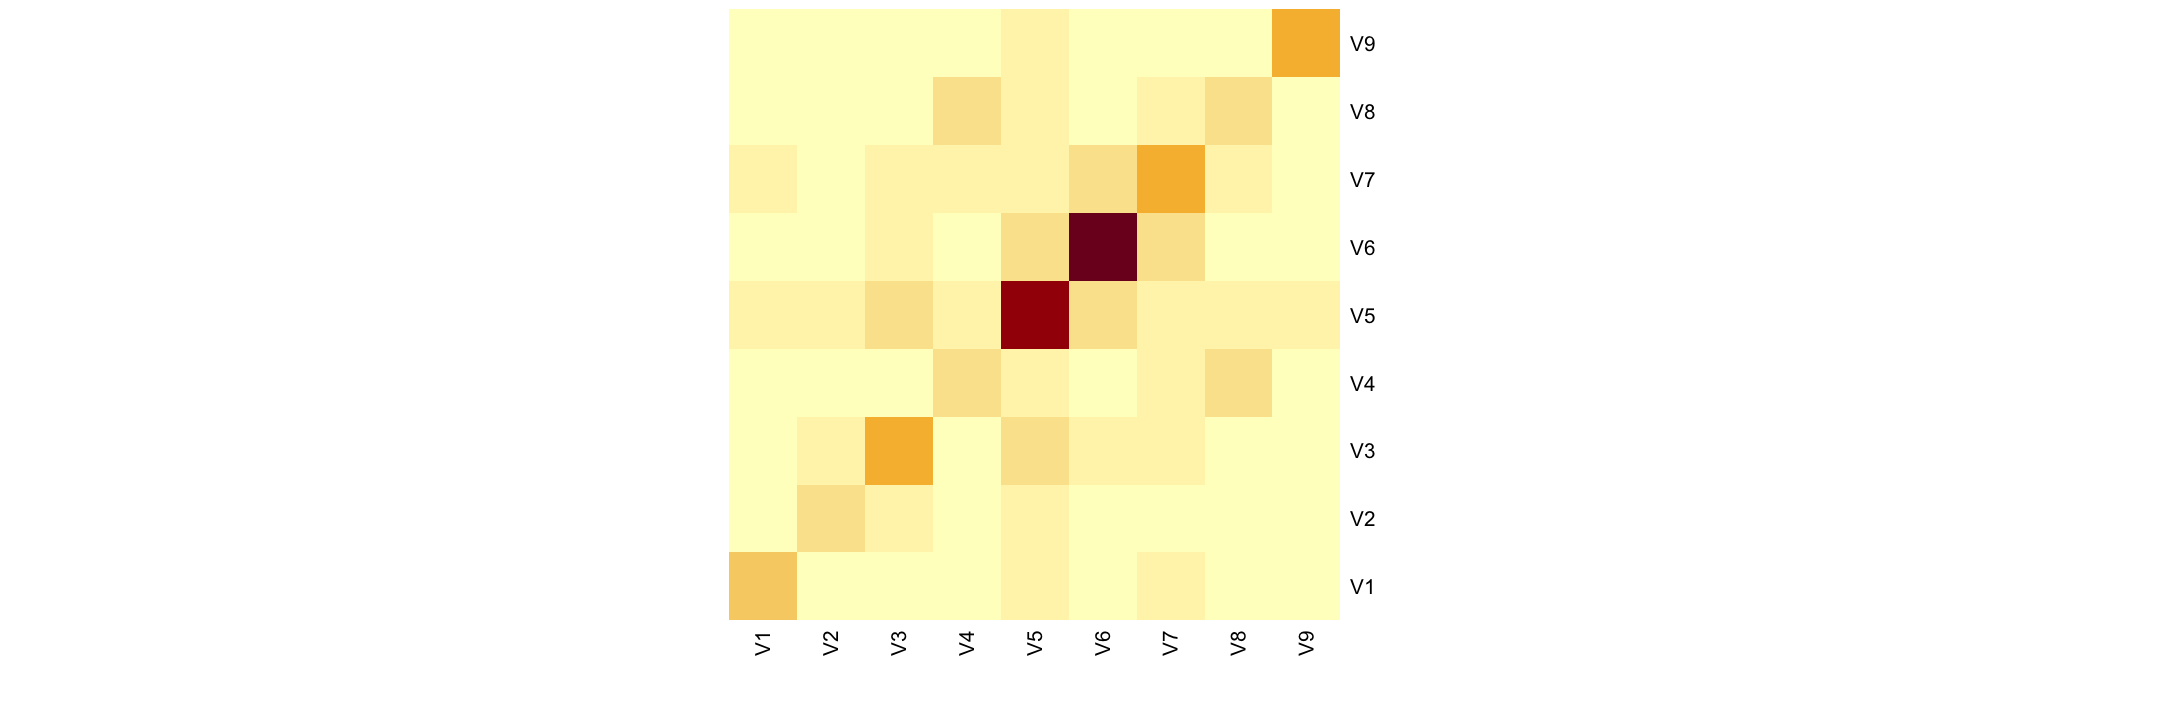

In [13]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3));
heatmap(sample_cov, Colv = NA, Rowv = NA, symm = TRUE)

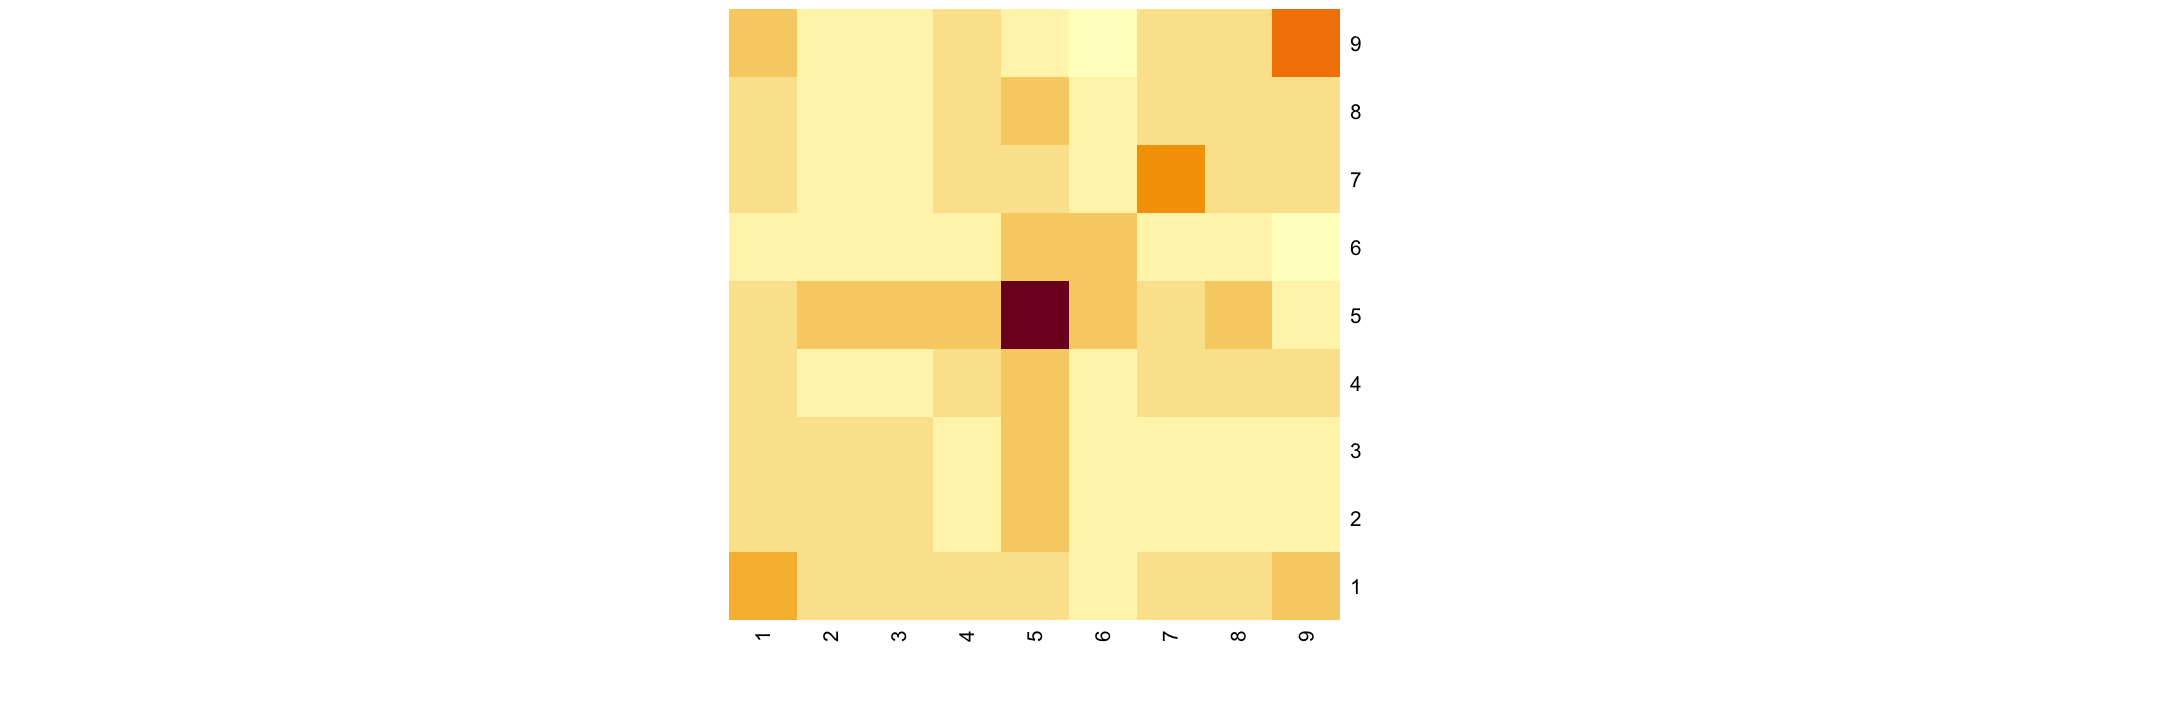

In [14]:
heatmap(covs[[length(covs)]], Colv = NA, Rowv = NA, symm = TRUE)